In [26]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
transaction_data = pd.read_csv('transaction_data.csv')

In [3]:
transaction_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
transaction_data.shape

(5315, 3)

In [7]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [9]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [10]:
transaction_data.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [12]:
tr = transaction_data.groupby('transaction', as_index = False)\
    .agg({'name':'count'})

In [13]:
tr.head()

,transaction,name
0,cancelled,1619
1,error,4
2,successfull,3692


<AxesSubplot:xlabel='transaction', ylabel='name'>

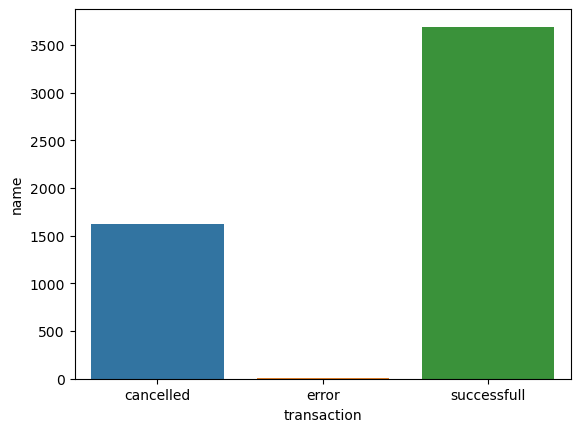

In [14]:
sns.barplot(data=tr, x="transaction", y="name")

In [15]:
transaction_data.head(1)

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled


array([[<AxesSubplot:title={'center':'transaction'}>]], dtype=object)

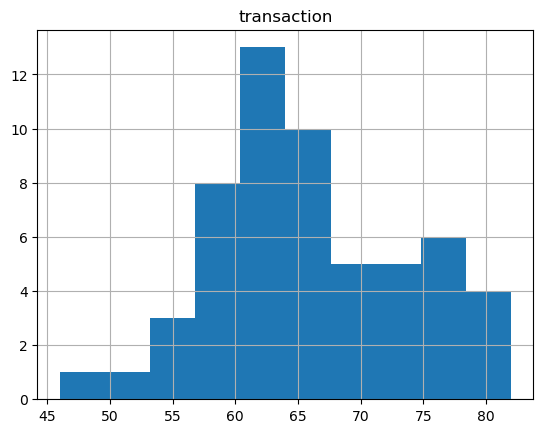

In [17]:
transaction_data.query("transaction == 'successfull'")\
    .groupby('name', as_index = False)\
    .agg({'transaction':'count'})\
    .hist()

In [20]:
transaction_data.query("transaction == 'successfull'")\
    .groupby('name', as_index = False)\
    .agg({'transaction':'count'})\
    .sort_values('transaction', ascending = False)\
    .describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [22]:
udp_df = pd.read_csv('transaction_data_updated.csv')

In [23]:
udp_df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [24]:
udp_df.fillna(0)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [30]:
pd.pivot_table(udp_df, values='transaction', index='minute', columns='name', aggfunc='count', fill_value=0)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1
5,3,0,2,3,1,0,5,3,1,3,...,0,2,3,1,0,0,3,0,2,1
6,4,1,2,2,0,4,5,2,2,2,...,2,1,4,1,2,4,1,2,0,2
7,3,2,1,2,2,3,4,1,1,3,...,3,1,1,2,4,1,0,1,2,2
8,2,4,3,1,0,3,2,1,1,0,...,0,1,0,1,2,4,2,1,1,1


In [31]:
udp_df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [41]:
udp_df['date'] = pd.to_datetime(udp_df['date'])

In [42]:
udp_df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [44]:
udp_df.date.dt.hour

0       0
1       0
2       1
3       0
4       0
       ..
5310    0
5311    0
5312    0
5313    0
5314    1
Name: date, Length: 5315, dtype: int64

In [45]:
udp_df['true_minute'] = (udp_df.date.dt.hour) * 60 + (udp_df.date.dt.minute) 

In [46]:
udp_df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


<AxesSubplot:xlabel='true_minute', ylabel='count'>

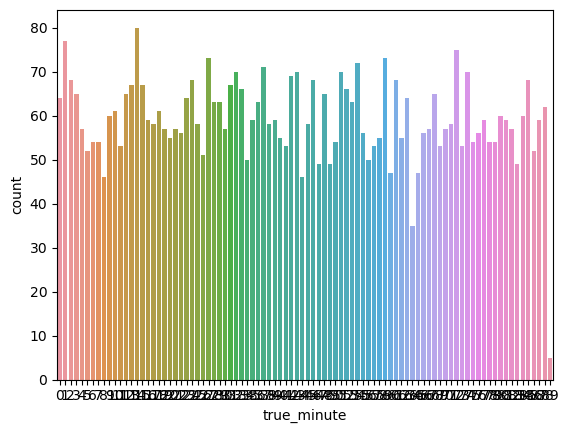

In [48]:
sns.countplot(x=udp_df["true_minute"])